In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from transformer_thermal_model.model import Model
from transformer_thermal_model.schemas import InputProfile, UserTransformerSpecifications
from transformer_thermal_model.transformer import DistributionTransformer

In [2]:
datetime_index = [pd.to_datetime("2025-07-01 00:00:00") + pd.Timedelta(minutes=15 * i) for i in np.arange(0, 10)]

load_series = pd.Series(data=np.sin(np.arange(0, 10) * 900 * 2 * np.pi * 1 / 43200) * 500 + 500, index=datetime_index)
ambient_series = pd.Series(data=20, index=datetime_index)

# Create an input object with the profiles
profile_input = InputProfile.create(
    datetime_index=datetime_index, load_profile=load_series, ambient_temperature_profile=ambient_series
)

The next step is to create a distribution transformer object. We will use the default specifications of the distribution transformer. Additionally, there are four mandatory specifications to be set: 
* The nominal current at the secondary side [A]
* The load loss [W]
* The no-load loss [W]
* The ambient temperature surcharge [K]

The four specifications are set using the `UserTransformerSpecifications` object.

Note that the cooling type is ONAN by default for distribution transformers.


In [3]:
transformer_specifications = UserTransformerSpecifications(
    load_loss=5200,  # Transformer load loss [W]
    nom_load_sec_side=900,  # Transformer nominal current secondary side [A]
    no_load_loss=800,  # Transformer no-load loss [W]
    amb_temp_surcharge=10,  # Ambient temperature surcharge [K]
)
transformer = DistributionTransformer(user_specs=transformer_specifications)

In [4]:
model = Model(temperature_profile=profile_input, transformer=transformer, initial_load=500)

results = model.run()

The output, `results`, contains to output profiles: the top-oil temperature profile and the hot-spot temperature profile. Lets plot them to see how warm our transformer became in this summer week.  

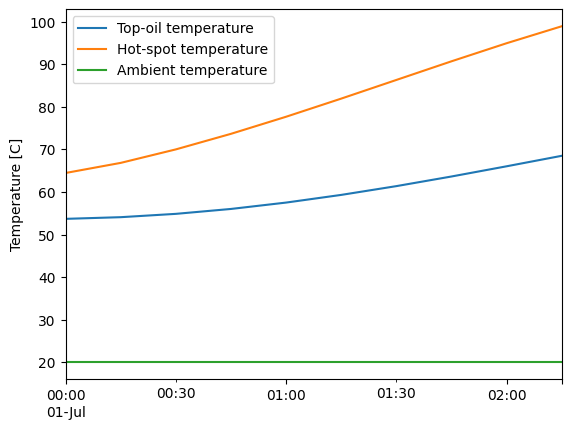

In [6]:
fig = plt.figure()
ax = results.top_oil_temp_profile.plot(label="Top-oil temperature")
results.hot_spot_temp_profile.plot(label="Hot-spot temperature")
ambient_series.plot(label="Ambient temperature")
ax.set_ylabel("Temperature [C]")

ax.legend()